<a href="https://colab.research.google.com/github/YagyanshB/machine-learning-/blob/main/basic_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Building a Simple Logistic Regression Model

In [3]:
class VerySimpleLogisticRegression:

    def __init__(self):
        # We'll just have one weight and one bias
        self.weight = None  # This is like the "slope"
        self.bias = None   # This is like the "starting point"

    def sigmoid(self, x):
        # Convert any number into a probability (0 to 1)
        return 1 / (1 + np.exp(-x))

    def train(self, study_hours, passed):
        """
        study_hours: Hours each student studied
        passed: Whether they passed (1) or failed (0)
        """
        # Start with random guesses
        self.weight = 0
        self.bias = 0

        # Learn from data 100 times
        learning_rate = 0.1

        for i in range(100):
            # Step 1: Make predictions with current weight/bias
            prediction = self.sigmoid(self.weight * study_hours + self.bias)

            # Step 2: Calculate the error
            error = prediction - passed

            # Step 3: Update weight and bias to reduce error
            self.weight = self.weight - learning_rate * np.mean(error * study_hours)
            self.bias = self.bias - learning_rate * np.mean(error)

    def predict(self, study_hours):

        # Make pass/fail prediction for new study hours

        probability = self.sigmoid(self.weight * study_hours + self.bias)
        return probability > 0.5  # Return True if probability > 0.5

In [4]:
# Create example data

study_hours = np.array([1, 2, 3, 4, 5, 6, 7, 8])
passed = np.array([0, 0, 0, 0, 1, 1, 1, 1])  # Students who studied ≥5 hours passed

# Create and train model

model = VerySimpleLogisticRegression()
model.train(study_hours, passed)

In [5]:
# Let's test it

test_hours = np.array([2.5, 7.5])
predictions = model.predict(test_hours)

print(f"Student studying 2.5 hours: {'Pass' if predictions[0] else 'Fail'}")
print(f"Student studying 7.5 hours: {'Pass' if predictions[1] else 'Fail'}")

Student studying 2.5 hours: Fail
Student studying 7.5 hours: Pass


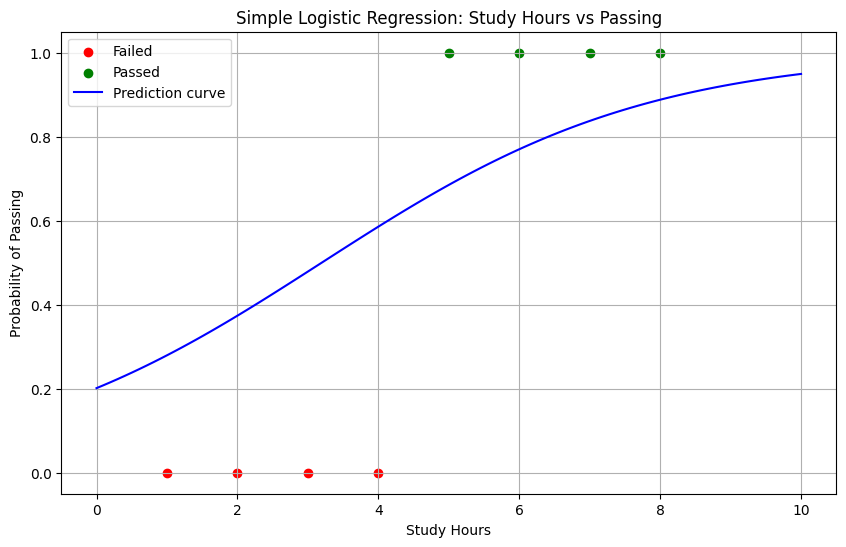

In [6]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(study_hours[passed == 0], passed[passed == 0], color='red', label='Failed')
plt.scatter(study_hours[passed == 1], passed[passed == 1], color='green', label='Passed')

# Plot decision boundary
x_test = np.linspace(0, 10, 100)
y_test = model.sigmoid(model.weight * x_test + model.bias)
plt.plot(x_test, y_test, 'b-', label='Prediction curve')

plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.title('Simple Logistic Regression: Study Hours vs Passing')
plt.legend()
plt.grid(True)
plt.show()